# 📌ACTIVIDAD 3: CREAR UN SISTEMA TASADOR DE VIVIENDAS.

## DEFINIR Y RECOPILAR DATOS

ENTREGA:
a0) Añade a la hoja de cálculo 10 ejemplos y aporta una columna

a) Análisis y preprocesamiento de datos:

• Análisis de datos: histogramas, boxplots, cantidad de datos ausentes, presencia de outliers.

• Codificación de categóricas: label-encoding o one-hot-encoding.

• Detección e imputación de ausentes.

• Detección e imputación de anomalías.

• Escalado de numéricas.

• Debes ir creando un pipeline de manera que se le facilite uno de los ejemplos y lo
preprocese para dárselo al modelo.

a) Selección de características:

• Matriz de correlaciones y mapa de calor: más fácil de interpretar si dejas el target como la primera característica.

• Estudio estadístico univariado (eliminar características con poca influencia en target).

• Estudio de colinealidad por parejas (eliminar alta correlación entre predictoras).

c) Selección de modelos de regresión: debes considerar al menos 5 diferentes y uno de ellos el
método de mínimos cuadrados. Recuerda que tienes LinearRegressor, SGDRegressor, Ridge,
Lasso, ElasticNet, K-NN, polinómico...

d) Estudio de varianza de modelos con CV.

e) Seleccionar los dos que mejor desempeño muestren justificando su elección.

f) Configuración de hiperparámetros con grid-search en los mejores 2 modelos seleccionados.

f) Estudio final de errores en las predicciones y gráfico de importancia de características.

g) Selección justificada del mejor y su descripción:

• Qué predictoras utiliza.

• Una descripción de su utilización y procesos que realiza (preprocesamiento, ...).

• Qué desempeño alcanza en train y test (indica también la métrica empleada)

• Una valoración final de tu modelo según los resultados obtenidos.

h) Guarda el modelo en un fichero con el nombre <iniciales>_modelo_u02_p03_a3.joblib
donde <iniciales> son las 3 primeras letras del nombre y apellidos, en mi caso sería
"josrosrod_modelo_u02_p03_a3.joblib"

## Carga de Librerías y Datos

In [426]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.calibration import LabelEncoder #LabelEncoder
from sklearn.model_selection import train_test_split #Entrenamiento
from sklearn.discriminant_analysis import StandardScaler #Normalización con Scaler
from sklearn.tree import DecisionTreeRegressor #DecisionTreeRegressor
from sklearn.linear_model import LinearRegression #LinearRegression
from sklearn.ensemble import RandomForestRegressor #RandomForestRegressor
from sklearn.model_selection import GridSearchCV #GridSearch

from sklearn.linear_model import Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.linear_model import Ridge #Ridge
from sklearn.pipeline import make_pipeline #Polinomial
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor #KNN
from joblib import dump #Para guardar el modelo


### Carga de datos

In [391]:
#Cargamos los datos del excel
df = pd.read_excel("Complementos/datos_viviendas.xlsx")

target = 'josrosrod_precio'
numericas = ['juamarper_trastero','josrosrod_dia','josrosrod_mes','josrosrod_año','josrosrod_latitud','josrosrod_longitud','davsoreng_duplex','rafmaralf_baños',
             'davroctau_planta','rauramesc_airecentral','guifue_parking','elilopper_distanciaCentro','ricmirber_longitud','omapasvac_ascensor','samartlop:superficie','alegarsal_terraza']
categoricas = ['josrosrod_origen','jorosrod_municipio','alvbelnav_iluminacion','luctarcom_orientacion']

### Presentación de los primeros datos

In [392]:
df.head()

,josrosrod_origen,jorosrod_municipio,josrosrod_dia,josrosrod_mes,josrosrod_año,ricmirber_longitud,josrosrod_lat,josrosrod_precio,alvbelnav_iluminacion,davsoreng_duplex,...,rafmaralf_baños,luctarcom_orientacion,samartlop_superficie,davroctau_planta,juamarper_trastero,robripcon_habitaciones,omapasvac_ascensor,elilopper_distanciaCentro,rauramesc_airecentral,guifue_parking
0,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.395,39.418,140000.0,Alta,0.0,...,1.0,Sureste,81.0,1.0,1.0,3.0,1.0,6.0,1.0,0.0
1,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.398,39.417,85000.0,Alta,0.0,...,1.0,Este,161.0,1.0,0.0,1.0,0.0,7.0,1.0,0.0
2,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.3987,39.4149,225000.0,Alta,0.0,...,2.0,Este,179.0,1.0,1.0,3.0,0.0,6.0,1.0,0.0
3,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.399,39.4145,129999.0,Alta,0.0,...,1.0,Sur,89.0,2.0,0.0,3.0,1.0,6.0,0.0,0.0
4,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.3985,39.4133,145000.0,Baja,0.0,...,1.0,Oeste,55.0,1.0,0.0,1.0,1.0,6.0,1.0,0.0


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   josrosrod_origen           140 non-null    object 
 1   jorosrod_municipio         140 non-null    object 
 2   josrosrod_dia              141 non-null    float64
 3   josrosrod_mes              141 non-null    float64
 4   josrosrod_año              141 non-null    float64
 5   ricmirber_longitud         141 non-null    object 
 6   josrosrod_lat              141 non-null    object 
 7   josrosrod_precio           141 non-null    float64
 8   alvbelnav_iluminacion      140 non-null    object 
 9   davsoreng_duplex           141 non-null    float64
 10  alegarsal_terraza          141 non-null    float64
 11  rafmaralf_baños            141 non-null    float64
 12  luctarcom_orientacion      139 non-null    object 
 13  samartlop_superficie       141 non-null    float64

### Análisis y Limpieza de datos

In [394]:
df.describe()

,josrosrod_dia,josrosrod_mes,josrosrod_año,josrosrod_precio,davsoreng_duplex,alegarsal_terraza,rafmaralf_baños,samartlop_superficie,davroctau_planta,juamarper_trastero,robripcon_habitaciones,omapasvac_ascensor,elilopper_distanciaCentro,rauramesc_airecentral,guifue_parking
count,141.000000,141.000000,141.000000,1.410000e+02,141.000000,141.000000,141.000000,141.000000,140.000000,140.000000,141.000000,140.000000,141.000000,141.000000,141.000000
mean,15.657143,2.500000,2022.385714,3.436194e+05,0.290780,0.666667,2.092857,128.064286,1.877698,0.364286,3.314286,0.592857,8.705071,0.581560,0.510638
std,6.128122,2.306822,9.881863,5.937963e+05,0.471154,0.487950,1.413690,76.136176,1.781037,0.482957,1.464268,0.493066,8.829990,0.495062,0.628115
min,1.000000,1.000000,1963.000000,5.000000e+03,0.000000,0.000000,1.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,2.000000,2025.000000,1.450000e+05,0.000000,0.000000,1.000000,80.000000,1.000000,0.000000,3.000000,0.000000,3.100000,0.000000,0.000000
50%,16.000000,2.000000,2025.000000,2.100000e+05,0.000000,1.000000,2.000000,104.000000,1.438849,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000
75%,20.000000,2.000000,2025.000000,3.000000e+05,1.000000,1.000000,2.000000,140.000000,3.000000,1.000000,4.000000,1.000000,9.450000,1.000000,1.000000
max,31.000000,12.000000,2025.000000,5.000000e+06,2.000000,2.000000,11.000000,430.000000,11.000000,1.000000,10.000000,1.000000,42.400000,1.000000,5.000000


In [395]:
print(df.isnull().sum())

josrosrod_origen             4
jorosrod_municipio           4
josrosrod_dia                3
josrosrod_mes                3
josrosrod_año                3
ricmirber_longitud           3
josrosrod_lat                3
josrosrod_precio             3
alvbelnav_iluminacion        4
davsoreng_duplex             3
alegarsal_terraza            3
rafmaralf_baños              3
luctarcom_orientacion        5
samartlop_superficie         3
davroctau_planta             4
juamarper_trastero           4
robripcon_habitaciones       3
omapasvac_ascensor           4
elilopper_distanciaCentro    3
rauramesc_airecentral        3
guifue_parking               3
dtype: int64


Como podemos ver, tenemos varios valores nulos. Procederemos a eliminarlos

#### Comprobar tamaño

In [396]:
df.shape

(144, 21)

#### Comprobar duplicados

In [397]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
139    False
140    False
141     True
142     True
143    False
Length: 144, dtype: bool


In [398]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(144, 21)
(136, 21)


Tenemos registros duplicados pero no vamos a eliminarlos puesto que podrían ser de ligeras variaciones en pisos parecidos

De eliminarlo perderíamos pequeñas diferencias que para el modelo pueden ser buenas para que identifique algunos patrones

#### Limpieza de los datos nulos

In [399]:
df_clean = df.dropna()

### Detección de Valores Atípicos

Index(['josrosrod_dia', 'josrosrod_mes', 'josrosrod_año', 'josrosrod_precio',
       'davsoreng_duplex', 'alegarsal_terraza', 'rafmaralf_baños',
       'samartlop_superficie', 'davroctau_planta', 'juamarper_trastero',
       'robripcon_habitaciones', 'omapasvac_ascensor',
       'elilopper_distanciaCentro', 'rauramesc_airecentral', 'guifue_parking'],
      dtype='object')


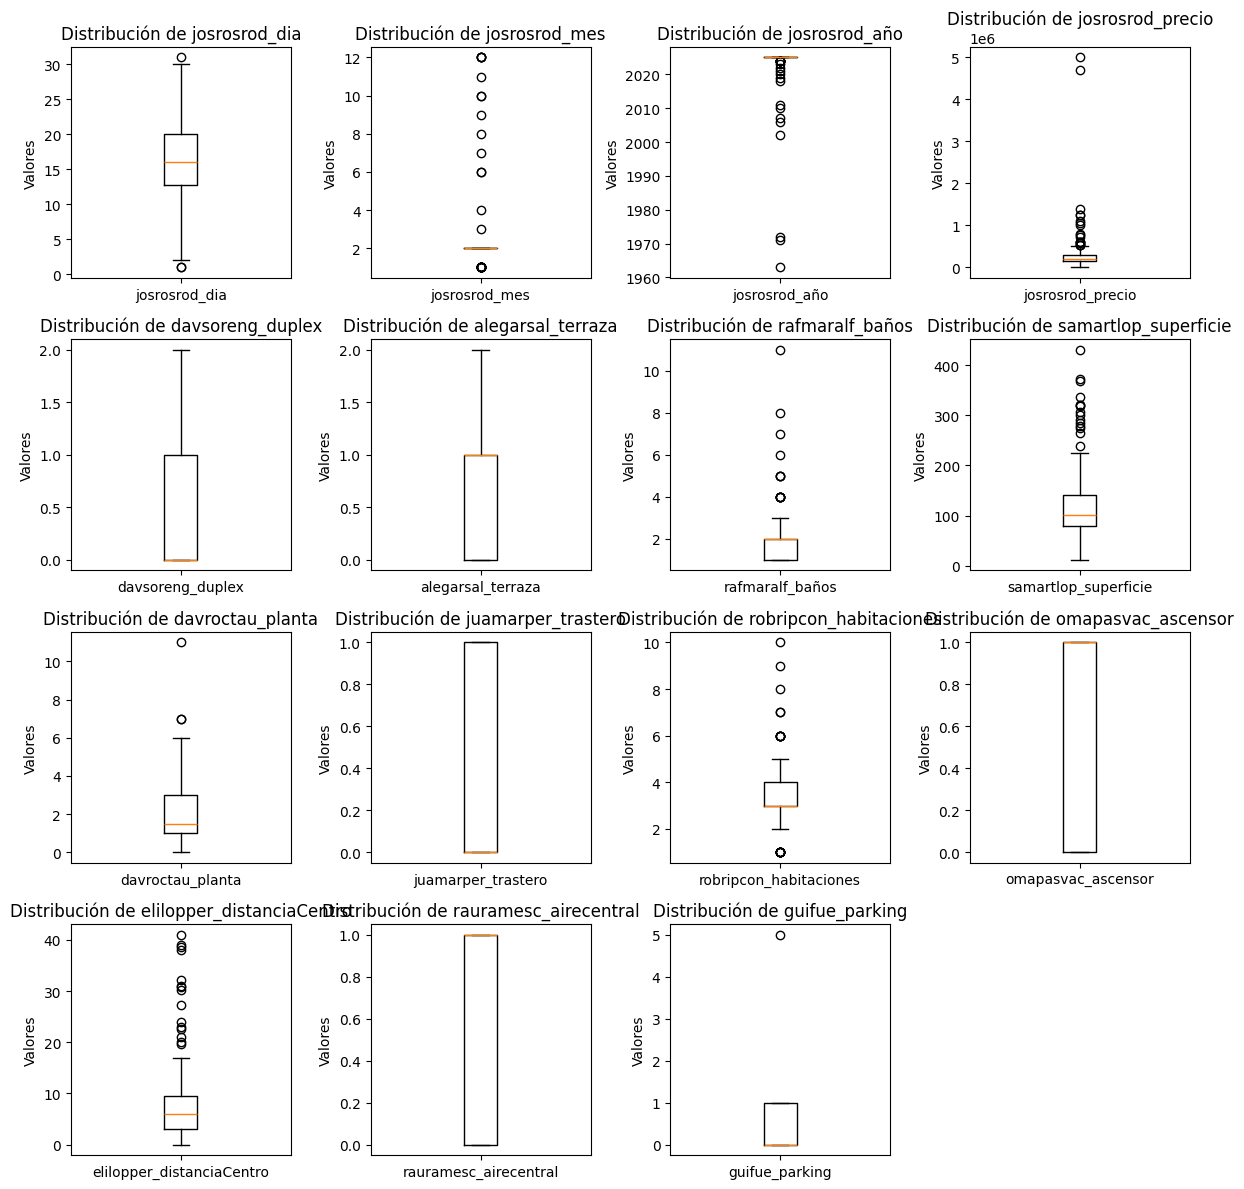

In [400]:
import matplotlib.pyplot as plt
import numpy as np

#Seleccionar solo las columnas numéricas
categorias = df_clean.select_dtypes(include='number').columns
print(categorias)

#Calcular la cantidad de filas y columnas necesarias dinámicamente
num_vars = len(categorias)
num_cols = 4  #Número fijo de columnas
num_rows = int(np.ceil(num_vars / num_cols))  #Calcular filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 3 * num_rows))

axes = axes.flatten()  #Aplanar la matriz de ejes para accederlos fácilmente

#Crear los boxplots
for i, var in enumerate(categorias):
    axes[i].boxplot(df_clean[var], tick_labels=[var])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_ylabel('Valores')

#Apagar los gráficos vacíos si hay más subgráficos de los necesarios
for j in range(num_vars, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Vemos diferentes outliers pero teniendo en cuenta la diversidad de las viviendas que pueden haber vamos a dejarlos como están

### Visualización de Datos

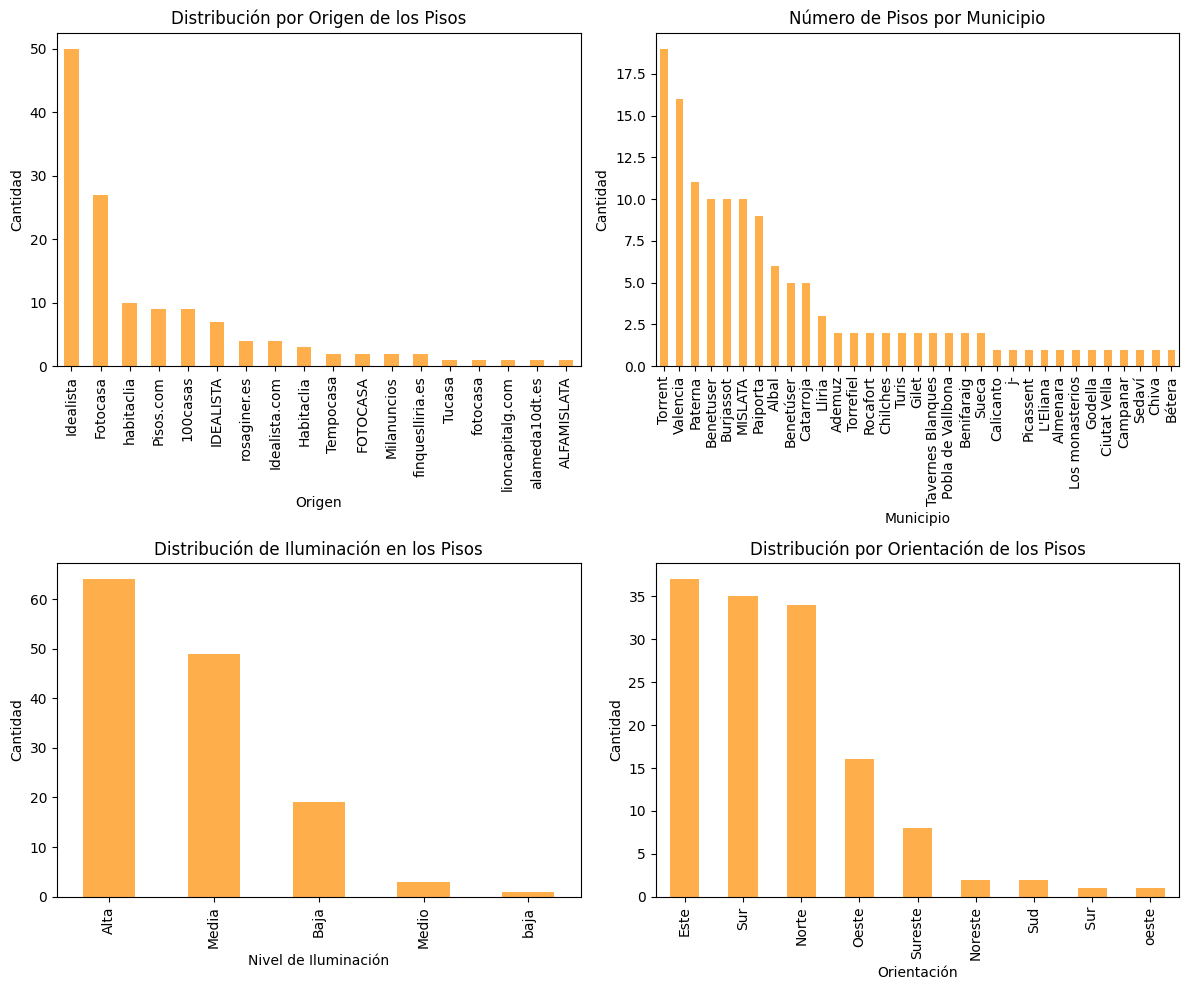

In [401]:
import matplotlib.pyplot as plt

#Configuración general de los gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

#Gráfico 1: Distribución por origen de los pisos
df["josrosrod_origen"].value_counts().plot(kind="bar", ax=axes[0], color="darkorange", alpha=0.7)
axes[0].set_title("Distribución por Origen de los Pisos")
axes[0].set_ylabel("Cantidad")
axes[0].set_xlabel("Origen")

#Gráfico 2: Distribución por municipio
df["jorosrod_municipio"].value_counts().plot(kind="bar", ax=axes[1], color="darkorange", alpha=0.7)
axes[1].set_title("Número de Pisos por Municipio")
axes[1].set_ylabel("Cantidad")
axes[1].set_xlabel("Municipio")

#Gráfico 3: Distribución por iluminación
df["alvbelnav_iluminacion"].value_counts().plot(kind="bar", ax=axes[2], color="darkorange", alpha=0.7)
axes[2].set_title("Distribución de Iluminación en los Pisos")
axes[2].set_ylabel("Cantidad")
axes[2].set_xlabel("Nivel de Iluminación")

#Gráfico 4: Distribución por orientación
df["luctarcom_orientacion"].value_counts().plot(kind="bar", ax=axes[3], color="darkorange", alpha=0.7)
axes[3].set_title("Distribución por Orientación de los Pisos")
axes[3].set_ylabel("Cantidad")
axes[3].set_xlabel("Orientación")

plt.tight_layout()
plt.show()


Como vemos algunos datos están repetidos

Procederemos a corregirlo

In [402]:
df['josrosrod_origen'] = df['josrosrod_origen'].replace("IDEALISTA", "Idealista")
df['josrosrod_origen'] = df['josrosrod_origen'].replace("Idealista.com", "Idealista")
df['josrosrod_origen'] = df['josrosrod_origen'].replace("FOTOCASA", "Fotocasa")
df['josrosrod_origen'] = df['josrosrod_origen'].replace("fotocasa", "Fotocasa")

df['alvbelnav_iluminacion'] = df['alvbelnav_iluminacion'].replace("media", "Media")
df['alvbelnav_iluminacion'] = df['alvbelnav_iluminacion'].replace("baja", "Baja")
df['alvbelnav_iluminacion'] = df['alvbelnav_iluminacion'].replace("Medio", "Media")

df['luctarcom_orientacion'] = df['luctarcom_orientacion'].replace("Sud", "Sur")
df['luctarcom_orientacion'] = df['luctarcom_orientacion'].replace("Sur ", "Sur")
df['luctarcom_orientacion'] = df['luctarcom_orientacion'].replace(" Sur", "Sur")
df['luctarcom_orientacion'] = df['luctarcom_orientacion'].replace("oeste", "Oeste")

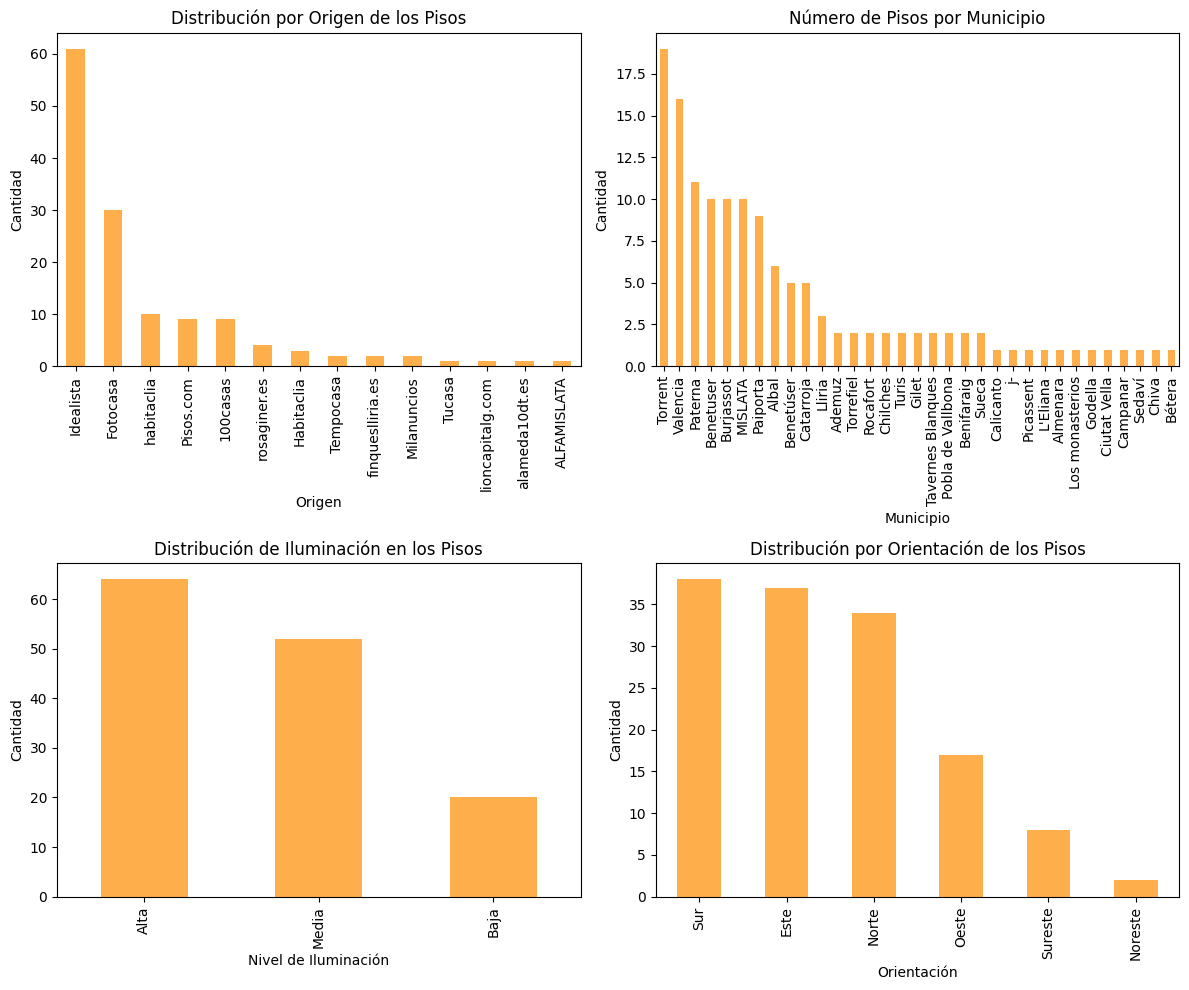

In [403]:
import matplotlib.pyplot as plt

#Configuración general de los gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

#Gráfico 1: Distribución por origen de los pisos
df["josrosrod_origen"].value_counts().plot(kind="bar", ax=axes[0], color="darkorange", alpha=0.7)
axes[0].set_title("Distribución por Origen de los Pisos")
axes[0].set_ylabel("Cantidad")
axes[0].set_xlabel("Origen")

#Gráfico 2: Distribución por municipio
df["jorosrod_municipio"].value_counts().plot(kind="bar", ax=axes[1], color="darkorange", alpha=0.7)
axes[1].set_title("Número de Pisos por Municipio")
axes[1].set_ylabel("Cantidad")
axes[1].set_xlabel("Municipio")

#Gráfico 3: Distribución por iluminación
df["alvbelnav_iluminacion"].value_counts().plot(kind="bar", ax=axes[2], color="darkorange", alpha=0.7)
axes[2].set_title("Distribución de Iluminación en los Pisos")
axes[2].set_ylabel("Cantidad")
axes[2].set_xlabel("Nivel de Iluminación")

#Gráfico 4: Distribución por orientación
df["luctarcom_orientacion"].value_counts().plot(kind="bar", ax=axes[3], color="darkorange", alpha=0.7)
axes[3].set_title("Distribución por Orientación de los Pisos")
axes[3].set_ylabel("Cantidad")
axes[3].set_xlabel("Orientación")

plt.tight_layout()
plt.show()


## Ingeniería de Características

#### Aplicar LabelEncoder a las columnas categóricas

Queremos convertir las categorías en números

In [404]:
for col in categoricas:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

#Comprobamos el resultado
df.head()

,josrosrod_origen,jorosrod_municipio,josrosrod_dia,josrosrod_mes,josrosrod_año,ricmirber_longitud,josrosrod_lat,josrosrod_precio,alvbelnav_iluminacion,davsoreng_duplex,...,rafmaralf_baños,luctarcom_orientacion,samartlop_superficie,davroctau_planta,juamarper_trastero,robripcon_habitaciones,omapasvac_ascensor,elilopper_distanciaCentro,rauramesc_airecentral,guifue_parking
0,2,3,16.0,2.0,2025.0,-0.395,39.418,140000.0,0,0.0,...,1.0,5,81.0,1.0,1.0,3.0,1.0,6.0,1.0,0.0
1,2,3,16.0,2.0,2025.0,-0.398,39.417,85000.0,0,0.0,...,1.0,0,161.0,1.0,0.0,1.0,0.0,7.0,1.0,0.0
2,2,3,16.0,2.0,2025.0,-0.3987,39.4149,225000.0,0,0.0,...,2.0,0,179.0,1.0,1.0,3.0,0.0,6.0,1.0,0.0
3,2,3,16.0,2.0,2025.0,-0.399,39.4145,129999.0,0,0.0,...,1.0,4,89.0,2.0,0.0,3.0,1.0,6.0,0.0,0.0
4,2,3,16.0,2.0,2025.0,-0.3985,39.4133,145000.0,1,0.0,...,1.0,3,55.0,1.0,0.0,1.0,1.0,6.0,1.0,0.0


In [405]:
#Función para limpiar valores incorrectos
def limpiar_float(valor):
    if isinstance(valor, str):  #Asegurar que es string
        valor = valor.replace(',', '.')  #Reemplazar comas por puntos
        partes = valor.split('.')  #Dividir por los puntos

        if len(partes) > 2:  #Si hay más de un punto, corregimos el formato
            valor = partes[0] + '.' + ''.join(partes[1:])  #Mantener solo el primer punto

    try:
        return float(valor)  #Intentar convertir a float
    except ValueError:
        return None  #Si hay error, devolver NaN

#Aplicamos a las columnas
df['josrosrod_lat'] = df['josrosrod_lat'].apply(limpiar_float)

df['ricmirber_longitud'] = df['ricmirber_longitud'].apply(limpiar_float)


#### Mapa de calor

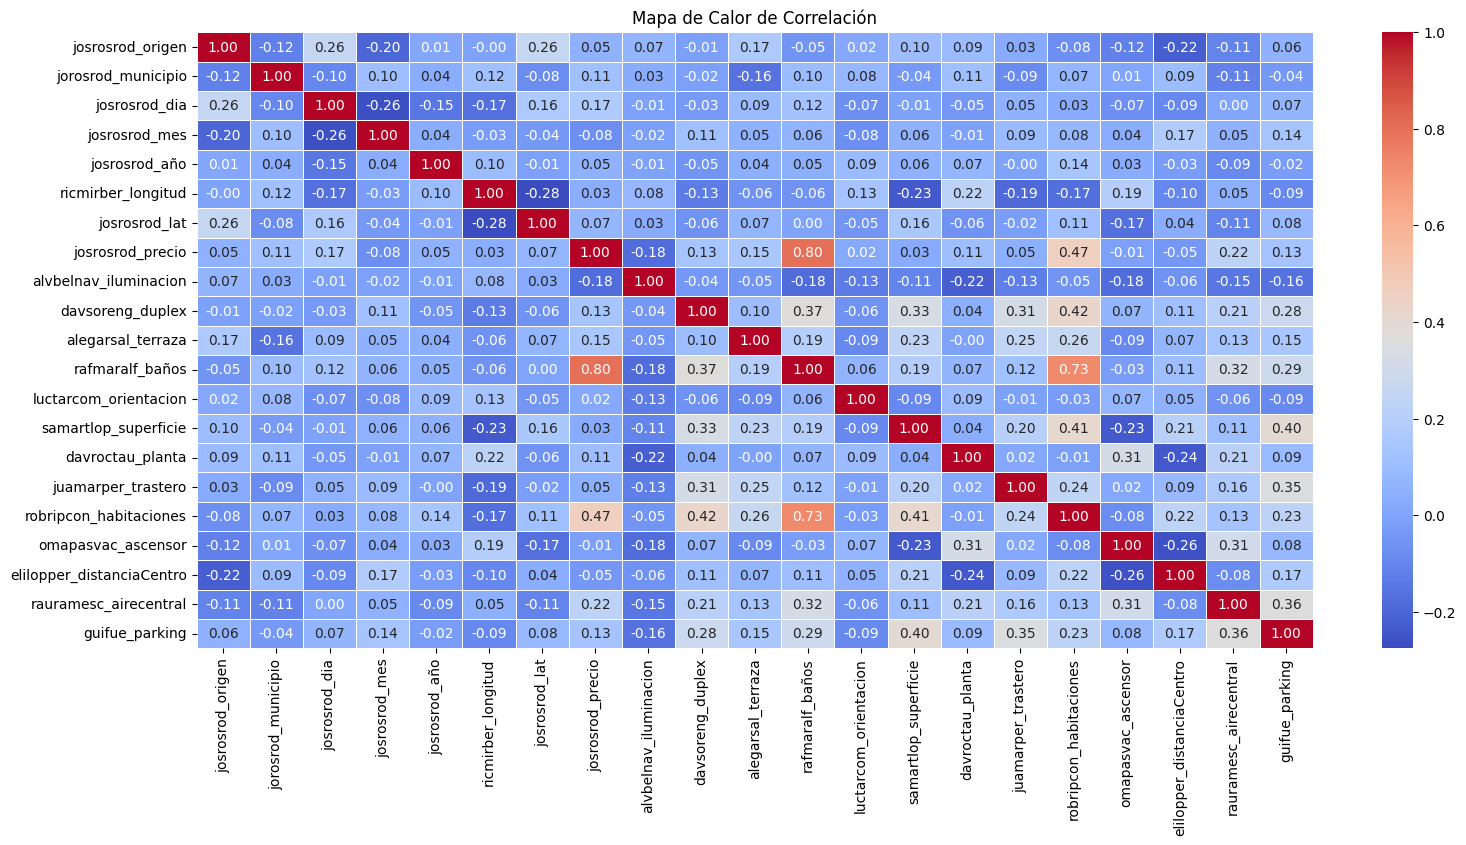

In [406]:
#Generar el mapa de calor
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

Nos quedaremos con:

**robripcon_habitaciones**, **rafmaralf_baños**, **rauramesc_airecentral**, **alegarsal_terraza**, **josrosrod_dia** y **guifue_parking**

ya que son las variables con mejor correlación con el target **josrosrod_precio**

In [407]:
df.columns

Index(['josrosrod_origen', 'jorosrod_municipio', 'josrosrod_dia',
       'josrosrod_mes', 'josrosrod_año', 'ricmirber_longitud', 'josrosrod_lat',
       'josrosrod_precio', 'alvbelnav_iluminacion', 'davsoreng_duplex',
       'alegarsal_terraza', 'rafmaralf_baños', 'luctarcom_orientacion',
       'samartlop_superficie', 'davroctau_planta', 'juamarper_trastero',
       'robripcon_habitaciones', 'omapasvac_ascensor',
       'elilopper_distanciaCentro', 'rauramesc_airecentral', 'guifue_parking'],
      dtype='object')

#### Selección de Variables y División de los Datos

In [408]:
X = df[["robripcon_habitaciones", "rafmaralf_baños", "rauramesc_airecentral", "alegarsal_terraza", "josrosrod_dia", "guifue_parking"]]
y = df[target]

#Dividimos los datos 80 20
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


#### Normalización (Escalar los datos es importante en Regresión)

In [409]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

## Entrenamiento de Modelos (Regresión)

Vamos a probar diferentes modelos para ver como se comportan

##### DecisionTreeRegressor

In [410]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

#Predecir sobre el conjunto de validación
predicciones = dtr.predict(X_val)  # Usar X_val para predicciones

#Calcular el error
error_val = mean_absolute_error(y_val, predicciones)  # Comparar con y_val
print(f'Métrica para datos de validación: {error_val}')

Métrica para datos de validación: 143035.7142857143


##### RandomForest Regressor

In [411]:
rfr = RandomForestRegressor(max_depth=6, random_state=42)
rfr.fit(X_train, y_train)

#Predecir sobre el conjunto de validación
predicciones = rfr.predict(X_val)

#Calcular el error
error_val = mean_absolute_error(y_val, predicciones)
print(f'Métrica para datos de validación: {error_val}')

Métrica para datos de validación: 106162.8886906367


##### LinearRegression

In [412]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predecir sobre el conjunto de validación
predicciones = lr.predict(X_val)  # Usar X_val para predicciones

# Calcular el error
error_val = mean_absolute_error(y_val, predicciones)  # Comparar con y_val
print(f'Métrica para datos de validación: {error_val}')

Métrica para datos de validación: 215316.6777658708


##### Polinomial

In [413]:
#Modelo Polinómico sin restricciones (grado 2 por defecto)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

#Predicciones y evaluación
predicciones_poly = poly_model.predict(X_val)
error_poly = mean_absolute_error(y_val, predicciones_poly)
print(f"MAE Regresión Polinómica: {error_poly}")


MAE Regresión Polinómica: 180455.85714285713


##### Lasso

In [414]:
#Modelo Lasso sin restricciones
lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)

#Predicciones y evaluación
predicciones_lasso = lasso.predict(X_val)
error_lasso = mean_absolute_error(y_val, predicciones_lasso)
print(f"MAE Lasso: {error_lasso}")


MAE Lasso: 215316.10250593143


##### Ridge

In [415]:
#Modelo Ridge sin restricciones (alpha por defecto)
ridge = Ridge(random_state=42)
ridge.fit(X_train, y_train)

#Predicciones y evaluación
predicciones_ridge = ridge.predict(X_val)
error_ridge = mean_absolute_error(y_val, predicciones_ridge)
print(f"MAE Ridge: {error_ridge}")


MAE Ridge: 214839.23752441045


K-Neighbors (KNN)

In [416]:
#Modelo KNN sin restricciones (k=5 por defecto)
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

#Predicciones y evaluación
predicciones_knn = knn.predict(X_val)
error_knn = mean_absolute_error(y_val, predicciones_knn)
print(f"MAE KNN: {error_knn}")


MAE KNN: 104371.42857142857


In [417]:
#Modelo ElasticNet sin restricciones (valores por defecto de alpha y l1_ratio)
elastic_net = ElasticNet(random_state=42)
elastic_net.fit(X_train, y_train)

#Predicciones y evaluación
predicciones_elasticnet = elastic_net.predict(X_val)
error_elasticnet = mean_absolute_error(y_val, predicciones_elasticnet)
print(f"MAE ElasticNet: {error_elasticnet}")


MAE ElasticNet: 211544.21442356444


#### SGD Regressor

In [418]:
#Modelo SGDRegressor sin restricciones
sgd_regressor = SGDRegressor(random_state=42)
sgd_regressor.fit(X_train, y_train)

#Predicciones y evaluación
predicciones_sgd = sgd_regressor.predict(X_val)
error_sgd = mean_absolute_error(y_val, predicciones_sgd)
print(f"MAE SGDRegressor: {error_sgd}")


MAE SGDRegressor: 197050.8467613544


En definitiva nos quedaríamos con KNN ya que es el que mejor resultado nos da al tener el MAE más bajo con un **104371.42857142857**

### Importancia de Características

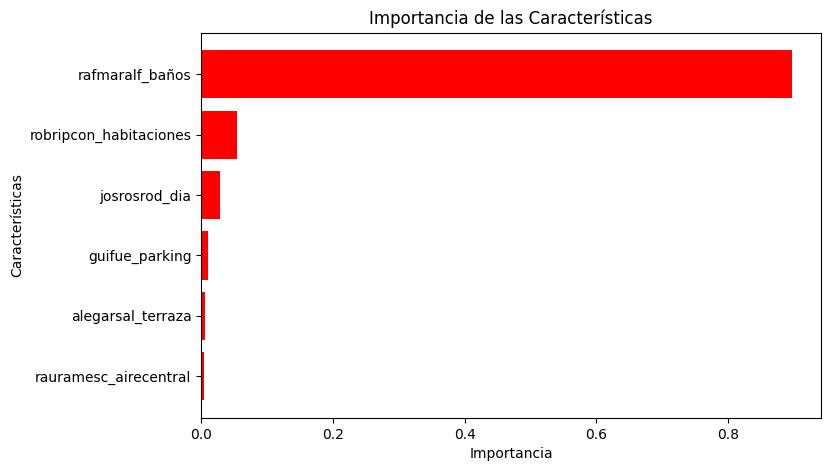

In [419]:
#Obtener la importancia de las características
importancia = rfr.feature_importances_
variables = ["robripcon_habitaciones", "rafmaralf_baños", "rauramesc_airecentral", "alegarsal_terraza", "josrosrod_dia", "guifue_parking"]

#Crear un DataFrame con los valores
importancia_df = pd.DataFrame({'Característica': variables, 'Importancia': importancia})

#Ordenar por importancia
importancia_df = importancia_df.sort_values(by='Importancia', ascending=True)

#Mostrar la importancia de las características
plt.figure(figsize=(8, 5))
plt.barh(importancia_df['Característica'], importancia_df['Importancia'], color='red')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.show()

## Selección de Modelos de Regresión

**c)**



In [420]:
#Modelos a comprobar
modelos = {
    "RandomForest": RandomForestRegressor(max_depth=5, random_state=42),
    "ElasticNet": ElasticNet(random_state=42),
    "DecisionTree": DecisionTreeRegressor(max_depth=7, min_samples_split=10, random_state=42),
    "PolynomialRegression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),    
    "KNeighbors": KNeighborsRegressor(n_neighbors=1),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "LinearRegression": LinearRegression(),
    "SGDRegressor": SGDRegressor(random_state=42)
}

#Almacenamos los resultados
resultados = {}

#Entrenamos y evaluamos cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    predicciones = modelo.predict(X_val)  # Predecir en el conjunto de validación
    error = mean_absolute_error(y_val, predicciones)  # Calcular MAE
    resultados[nombre] = error  # Guardar el error en el diccionario
    print(f'{nombre} - MAE: {error:.4f}')

#Seleccionamos los dos mejores modelos (menor MAE es mejor)
mejores_modelos = sorted(resultados.items(), key=lambda x: x[1])[:2]

print("\nMejores modelos por el momento:", mejores_modelos)


RandomForest - MAE: 94952.5490
ElasticNet - MAE: 211544.2144
DecisionTree - MAE: 104454.6117
PolynomialRegression - MAE: 180455.8571
KNeighbors - MAE: 143214.2857
Ridge - MAE: 214839.2375
Lasso - MAE: 215316.1025
LinearRegression - MAE: 215316.6778
SGDRegressor - MAE: 197050.8468

Mejores modelos por el momento: [('RandomForest', np.float64(94952.54904962743)), ('DecisionTree', np.float64(104454.61167800453))]


Nos quedamos con K-Neighbors ya que su MAE es más bajo

La otra opción que escogeremoms será Polinómico

#### Selección de Modelos con Validación Cruzada

d)

Trabajamos con los datos de entrenamiento para hacer la validación cruzada

In [421]:
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(f"{nombre} - MAE promedio: {-np.mean(scores):.4f}, Varianza: {np.std(scores):.4f}")


RandomForest - MAE promedio: 190575.1039, Varianza: 157272.6544
ElasticNet - MAE promedio: 228373.5537, Varianza: 136038.0153
DecisionTree - MAE promedio: 199057.8220, Varianza: 179591.6407
PolynomialRegression - MAE promedio: 266992.4084, Varianza: 107193.4217
KNeighbors - MAE promedio: 278676.0351, Varianza: 157132.1159
Ridge - MAE promedio: 264382.2166, Varianza: 103427.5604
Lasso - MAE promedio: 267682.7657, Varianza: 101328.1200
LinearRegression - MAE promedio: 267684.2656, Varianza: 101328.1196
SGDRegressor - MAE promedio: 350929.8180, Varianza: 166118.0495


Con estos resultados seguimos quedándonos con **RandomForest** y **DecisionTree** ya que siguen siendo los mejores en CV


Random Forest es el mejor modelo por su MAE y capacidad para conseguir relaciones complejas entre las características

DecisionTree es el siguiente con el que nos quedaríamos ya que sigue siendo válido y puede ser una alternativa buena


### Optimización de Hiperparámetros (GridSearch)

**f)**

In [422]:
#Definir el espacio de búsqueda para Random Forest
parametros_rf = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [5, 10, 15],       # Profundidad máxima
    'min_samples_split': [2, 5, 10], # Mínimo número de muestras para dividir un nodo
}

#Configurar Grid Search para Random Forest
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), parametros_rf, cv=5, scoring='neg_mean_absolute_error')
grid_rf.fit(X_train, y_train)

#Mostrar los mejores hiperparámetros y el MAE correspondiente
print(f"Mejor configuración Random Forest: {grid_rf.best_params_}")
print(f"Mejor MAE Random Forest: {-grid_rf.best_score_:.4f}")


Mejor configuración Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Mejor MAE Random Forest: 190040.9569


In [ ]:
#Definir el espacio de búsqueda para Decision Tree
parametros_dt = {
    'max_depth': [5, 10, 15],        # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10], # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],   # Mínimo número de muestras en una hoja
}

#Configurar Grid Search para Decision Tree
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), parametros_dt, cv=5, scoring='neg_mean_absolute_error')
grid_dt.fit(X_train, y_train)

#Mostrar los mejores hiperparámetros y el MAE correspondiente
print(f"Mejor configuración Decision Tree: {grid_dt.best_params_}")
print(f"Mejor MAE Decision Tree: {-grid_dt.best_score_:.4f}")


Mejor configuración Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor MAE Decision Tree: 188366.2173


#### Estudio Final de Errores en Predicciones

g)



In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

#Evaluar el modelo Random Forest optimizado
mejor_rf = grid_rf.best_estimator_
y_pred_rf = mejor_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}")

#Evaluar el modelo Decision Tree optimizado
mejor_dt = grid_dt.best_estimator_
y_pred_dt = mejor_dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree - MAE: {mae_dt:.4f}, R²: {r2_dt:.4f}")


Random Forest - MAE: 179003.4485, R²: -0.0865
Decision Tree - MAE: 146367.8429, R²: 0.0937


Para realizar la importancia de características nos quedaremos con Decision Tree ya que nos brinda mejores resultados.

Random Forest no está funcionando con la variabilidad de los datos

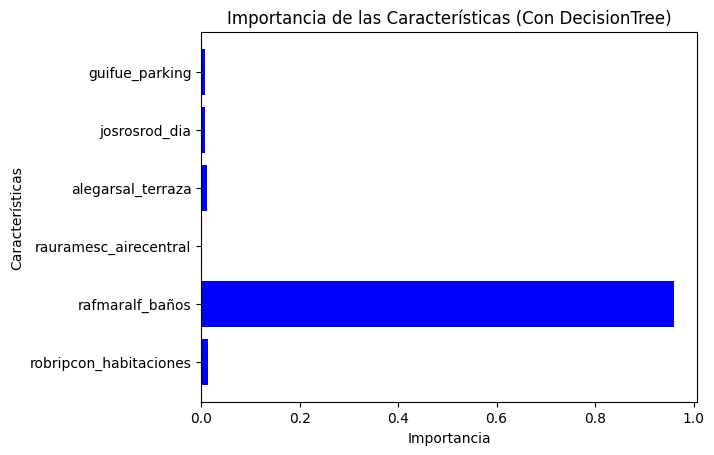

In [425]:
#Importancia de características (Con DecisionTree)
importances_dt = mejor_dt.feature_importances_
plt.barh(X.columns, importances_dt, color="blue")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de las Características (Con DecisionTree)")
plt.show()


### Guardar el Modelo

**i)**

In [ ]:
#Guardar el modelo final
dump(mejor_dt, "juamarper_modelo_u02_p03_a3.joblib")

print("Modelo guardado exitosamente como 'juamarper_modelo_u02_p03_a3.joblib'")

Modelo guardado exitosamente como 'josrosrod_modelo_u02_p03_a3.joblib'


## Valoración Final del Modelo Elegido (Decision Tree)


Utilizamos las siguientes características:

- **josrosrod_dia**

- **rafmaralf_baños**

- **robripcon_habitaciones**

- **alegarsal_terraza**

- **rauramesc_airecentral**

- **guifue_parking**

Buscamos seleccionar y entrenar diferentes modelos, entre ellos:

- **RandomForest**

- **ElasticNet**

- **DecisionTree**

- **Polinomial**

- **Ridge**

- **Lasso**

- **SGD**

- **K-Neighbors (KNN)**

Dividimos datos en validación y prueba y probamos cada modelo

Después hicimos **estudio de varianza con CV**, **configuramos parámetros con Grid Search** y mostramos un gráfico de características donde destacamos **rafmaralf_baños** como la característica más relevante

#### Desempeño en el conjunto de prueba

En el conjunto de prueba (X_test, y_test), el modelo alcanzó los siguientes resultados:

MAE (Mean Absolute Error): 146367.8429

Indica que, en promedio, las predicciones tienen un error absoluto de aproximadamente 146,368 unidades monetarias.

R² (Coeficiente de Determinación): 0.0937

Aunque bajo, este valor indica que el modelo explica aproximadamente el 9.37% de la variabilidad en los datos.


### En conclusión

El modelo no es perfecto, la capacidad predictiva del modelo es limitada y tiene ciertas limitaciones pero cumple con los requisitos del problema que se nos pide

Podríamos mejorarlo aplicando otras técnicas y eliminando algunas características que son irrelevantes como **rauramesc_airecentral** y otras, simplificando y haciéndolo más sólido
